<a href="https://colab.research.google.com/github/Ihalagedara/intrudion-detection-systen-using-SDN/blob/main/ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [381]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)
df_test_original = df_test_original.drop(["protocol_type", "service", "flag"],axis=1)
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)
df_train_original = df_train_original.drop(["protocol_type", "service", "flag"],axis=1)

# dos

In [382]:
dos_df_train = df_train

In [383]:
dos_df_test = df_test

In [384]:
for i in range(len(df_train)):
  if df_train["label"][i] == "normal":
    dos_df_train["label"][i] = 1
  elif df_train["label"][i] == "dos":
    dos_df_train["label"][i] = 0
  elif df_train["label"][i] == "r2l":
    dos_df_train["label"][i] = 1
  elif df_train["label"][i] == "probe":
    dos_df_train["label"][i] = 1
  elif df_train["label"][i] == "u2r":
    dos_df_train["label"][i] = 1
  else:
    dos_df_train["label"][i] = 1

<ipython-input-384-db6b4ed86e91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_train["label"][i] = 1
<ipython-input-384-db6b4ed86e91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_train["label"][i] = 0
<ipython-input-384-db6b4ed86e91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_train["label"][i] = 1
<ipython-input-384-db6b4ed86e91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [385]:
for i in range(len(df_test)):
  if df_test["label"][i] == "normal":
    dos_df_test["label"][i] = 1
  elif df_test["label"][i] == "dos":
    dos_df_test["label"][i] = 0
  elif df_test["label"][i] == "r2l":
    dos_df_test["label"][i] = 1
  elif df_test["label"][i] == "probe":
    dos_df_test["label"][i] = 1
  elif df_test["label"][i] == "u2r":
    dos_df_test["label"][i] = 1
  else:
    dos_df_test["label"][i] = 1

<ipython-input-385-09d8ece4e0bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_test["label"][i] = 0
<ipython-input-385-09d8ece4e0bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_test["label"][i] = 1
<ipython-input-385-09d8ece4e0bb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dos_df_test["label"][i] = 1
<ipython-input-385-09d8ece4e0bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [386]:
dos_df_train["label"].unique()

array([1, 0], dtype=object)

In [387]:
dos_df_test["label"].unique()

array([0, 1], dtype=object)

In [388]:
dos_x_train = dos_df_train[dos_df_train.columns[:-1]].values
dos_y_train = dos_df_train[dos_df_train.columns[-1]].values.astype('int')
dos_x_test = dos_df_test[dos_df_test.columns[:-1]].values
dos_y_test = dos_df_test[dos_df_test.columns[-1]].values.astype('int')

In [389]:
scaler = StandardScaler()
dos_x_train = scaler.fit_transform(dos_x_train)
dos_x_test = scaler.transform(dos_x_test)

In [390]:
num=[]
for i in range(dos_x_test.shape[0]):
    num.append(i+1)

## Log Regresion

In [391]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(dos_x_train, dos_y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [392]:
dos_lr_y_pred = lg_model.predict(dos_x_test)

In [393]:
print(classification_report(dos_y_test, dos_lr_y_pred))
dos_lr_mae = mean_absolute_error(dos_y_test, dos_lr_y_pred)
print("Error: " + str(dos_lr_mae))
dos_lr_acc = accuracy_score(dos_y_test, dos_lr_y_pred)
print("Accuracy: " + str(dos_lr_acc))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5741
           1       0.98      0.95      0.96     16802

    accuracy                           0.95     22543
   macro avg       0.92      0.94      0.93     22543
weighted avg       0.95      0.95      0.95     22543

Error: 0.052832364813911195
Accuracy: 0.9471676351860888


Text(0.5, 0.98, 'Log Regression')

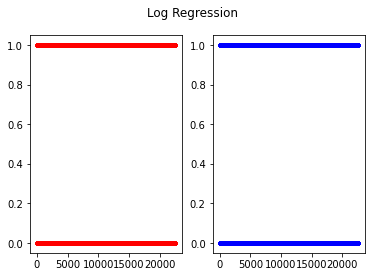

In [394]:
plt.subplot(121)
plt.scatter(num,dos_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,dos_lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

## XGBoost

In [395]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(dos_x_train, dos_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [396]:
dos_xgb_y_pred = xgb_model.predict(dos_x_test)

In [397]:
print(classification_report(dos_y_test, dos_xgb_y_pred))
dos_xgb_mae = mean_absolute_error(dos_y_test, dos_xgb_y_pred)
print("Error: " + str(dos_xgb_mae))
dos_xgb_acc = accuracy_score(dos_y_test, dos_xgb_y_pred)
print("Accuracy: " + str(dos_xgb_acc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5741
           1       0.98      1.00      0.99     16802

    accuracy                           0.98     22543
   macro avg       0.99      0.97      0.98     22543
weighted avg       0.98      0.98      0.98     22543

Error: 0.01508228718449186
Accuracy: 0.9849177128155081


Text(0.5, 0.98, 'XGBoost')

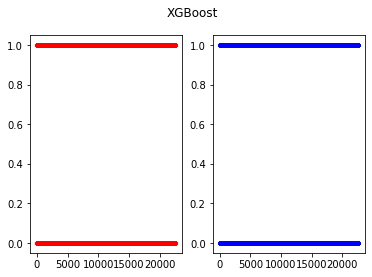

In [398]:
plt.subplot(121)
plt.scatter(num,dos_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,dos_xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

Text(0, 0.5, 'Accuracy')

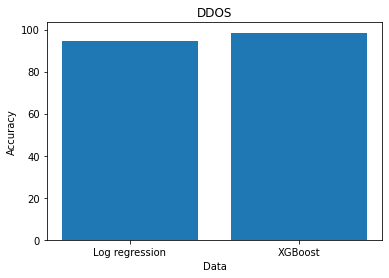

In [399]:
randommeanlist = [dos_lr_acc*100, dos_xgb_acc*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("DDOS")
plt.xlabel("Data")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean Average Error')

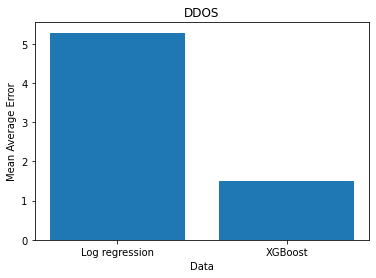

In [400]:
randommeanlist = [dos_lr_mae*100, dos_xgb_mae*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("DDOS")
plt.xlabel("Data")
plt.ylabel("Mean Average Error")

# R2L

In [401]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)
df_test_original = df_test_original.drop(["protocol_type", "service", "flag"],axis=1)
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)
df_train_original = df_train_original.drop(["protocol_type", "service", "flag"],axis=1)

In [402]:
r2l_df_train = df_train_original
r2l_df_test = df_test_original

In [403]:
r2l_df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [404]:
for i in range(len(r2l_df_train)):
  if r2l_df_train["label"][i] == "normal":
    r2l_df_train["label"][i] = 1
  elif r2l_df_train["label"][i] == "dos":
    r2l_df_train["label"][i] = 1
  elif r2l_df_train["label"][i] == "r2l":
    r2l_df_train["label"][i] = 0
  elif r2l_df_train["label"][i] == "probe":
    r2l_df_train["label"][i] = 1
  elif r2l_df_train["label"][i] == "u2r":
    r2l_df_train["label"][i] = 1
  else:
    r2l_df_train["label"][i] = 1

<ipython-input-404-5fbdf8dbd7eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_train["label"][i] = 1
<ipython-input-404-5fbdf8dbd7eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_train["label"][i] = 1
<ipython-input-404-5fbdf8dbd7eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_train["label"][i] = 0
<ipython-input-404-5fbdf8dbd7eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [405]:
for i in range(len(r2l_df_test)):
  if r2l_df_test["label"][i] == "normal":
    r2l_df_test["label"][i] = 1
  elif r2l_df_test["label"][i] == "dos":
    r2l_df_test["label"][i] = 1
  elif r2l_df_test["label"][i] == "r2l":
    r2l_df_test["label"][i] = 0
  elif r2l_df_test["label"][i] == "probe":
    r2l_df_test["label"][i] = 1
  elif r2l_df_test["label"][i] == "u2r":
    r2l_df_test["label"][i] = 1
  else:
    r2l_df_test["label"][i] = 1

<ipython-input-405-7242244e1f8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_test["label"][i] = 1
<ipython-input-405-7242244e1f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_test["label"][i] = 1
<ipython-input-405-7242244e1f8f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2l_df_test["label"][i] = 1
<ipython-input-405-7242244e1f8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [406]:
r2l_df_train["label"].unique()

array([1, 0], dtype=object)

In [407]:
r2l_x_train = r2l_df_train[r2l_df_train.columns[:-1]].values
r2l_y_train = r2l_df_train[r2l_df_train.columns[-1]].values.astype('int')
r2l_x_test = r2l_df_test[r2l_df_test.columns[:-1]].values
r2l_y_test = r2l_df_test[r2l_df_test.columns[-1]].values.astype('int')

In [408]:
scaler = StandardScaler()
r2l_x_train = scaler.fit_transform(r2l_x_train)
r2l_x_test = scaler.transform(r2l_x_test)

## Log Regression

In [409]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(r2l_x_train, r2l_y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [410]:
r2l_lr_y_pred = lg_model.predict(r2l_x_test)

In [411]:
print(classification_report(r2l_y_test, r2l_lr_y_pred))
r2l_lr_mae = mean_absolute_error(r2l_y_test, r2l_lr_y_pred)
print("Error: " + str(r2l_lr_mae))
r2l_lr_acc = accuracy_score(r2l_y_test, r2l_lr_y_pred)
print("Accuracy: " + str(r2l_lr_acc))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00      2199
           1       0.90      1.00      0.95     20344

    accuracy                           0.90     22543
   macro avg       0.62      0.50      0.48     22543
weighted avg       0.85      0.90      0.86     22543

Error: 0.09776870869005899
Accuracy: 0.902231291309941


Text(0.5, 0.98, 'Log Regression')

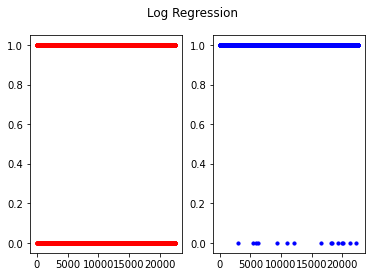

In [412]:
plt.subplot(121)
plt.scatter(num,r2l_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,r2l_lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

## XGBoost

In [413]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(r2l_x_train, r2l_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [414]:
r2l_xgb_y_pred = xgb_model.predict(r2l_x_test)

In [415]:
print(classification_report(r2l_y_test, r2l_xgb_y_pred))
r2l_xgb_mae = mean_absolute_error(r2l_y_test, r2l_xgb_y_pred)
print("Error: " + str(r2l_xgb_mae))
r2l_xgb_acc = accuracy_score(r2l_y_test, r2l_xgb_y_pred)
print("Accuracy: " + str(r2l_xgb_acc))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11      2199
           1       0.91      1.00      0.95     20344

    accuracy                           0.91     22543
   macro avg       0.95      0.53      0.53     22543
weighted avg       0.92      0.91      0.87     22543

Error: 0.09209067116177971
Accuracy: 0.9079093288382203


Text(0.5, 0.98, 'XGBoost')

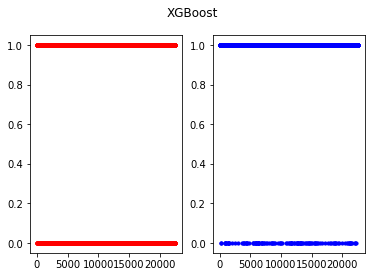

In [416]:
plt.subplot(121)
plt.scatter(num,r2l_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,r2l_xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

Text(0, 0.5, 'Accuracy')

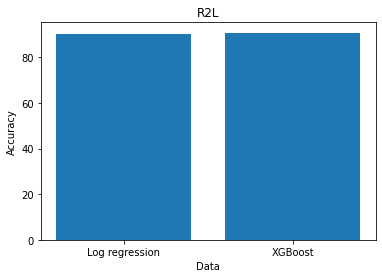

In [417]:
randommeanlist = [r2l_lr_acc*100, r2l_xgb_acc*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("R2L")
plt.xlabel("Data")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean Average Error')

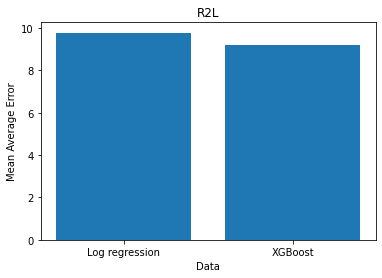

In [418]:
randommeanlist = [r2l_lr_mae*100, r2l_xgb_mae*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("R2L")
plt.xlabel("Data")
plt.ylabel("Mean Average Error")

# Probe

In [419]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)
df_test_original = df_test_original.drop(["protocol_type", "service", "flag"],axis=1)
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)
df_train_original = df_train_original.drop(["protocol_type", "service", "flag"],axis=1)

In [420]:
probe_df_train = df_train_original
probe_df_test = df_test_original

In [421]:
probe_df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [422]:
for i in range(len(probe_df_train)):
  if probe_df_train["label"][i] == "normal":
    probe_df_train["label"][i] = 1
  elif probe_df_train["label"][i] == "dos":
    probe_df_train["label"][i] = 1
  elif probe_df_train["label"][i] == "r2l":
    probe_df_train["label"][i] = 1
  elif probe_df_train["label"][i] == "probe":
    probe_df_train["label"][i] = 0
  elif probe_df_train["label"][i] == "u2r":
    probe_df_train["label"][i] = 1
  else:
    probe_df_train["label"][i] = 1

<ipython-input-422-21f392180185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_train["label"][i] = 1
<ipython-input-422-21f392180185>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_train["label"][i] = 1
<ipython-input-422-21f392180185>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_train["label"][i] = 1
<ipython-input-422-21f392180185>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [423]:
for i in range(len(probe_df_test)):
  if probe_df_test["label"][i] == "normal":
    probe_df_test["label"][i] = 1
  elif probe_df_test["label"][i] == "dos":
    probe_df_test["label"][i] = 1
  elif probe_df_test["label"][i] == "r2l":
    probe_df_test["label"][i] = 1
  elif probe_df_test["label"][i] == "probe":
    probe_df_test["label"][i] = 0
  elif probe_df_test["label"][i] == "u2r":
    probe_df_test["label"][i] = 1
  else:
    probe_df_test["label"][i] = 1

<ipython-input-423-37aefb2aefce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_test["label"][i] = 1
<ipython-input-423-37aefb2aefce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_test["label"][i] = 1
<ipython-input-423-37aefb2aefce>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probe_df_test["label"][i] = 1
<ipython-input-423-37aefb2aefce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [424]:
print(probe_df_train["label"].unique())
print(probe_df_test["label"].unique())

[1 0]
[1 0]


In [425]:
probe_x_train = probe_df_train[probe_df_train.columns[:-1]].values
probe_y_train = probe_df_train[probe_df_train.columns[-1]].values.astype('int')
probe_x_test = probe_df_test[probe_df_test.columns[:-1]].values
probe_y_test = probe_df_test[probe_df_test.columns[-1]].values.astype('int')

In [426]:
scaler = StandardScaler()
probe_x_train = scaler.fit_transform(probe_x_train)
probe_x_test = scaler.transform(probe_x_test)

## Log Regression

In [427]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(probe_x_train, probe_y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [428]:
probe_lr_y_pred = lg_model.predict(probe_x_test)

In [429]:
print(classification_report(probe_y_test, probe_lr_y_pred))
probe_lr_mae = mean_absolute_error(probe_y_test, probe_lr_y_pred)
print("Error: " + str(probe_lr_mae))
probe_lr_acc = accuracy_score(probe_y_test, probe_lr_y_pred)
print("Accuracy: " + str(probe_lr_acc))

              precision    recall  f1-score   support

           0       0.54      0.96      0.69      1106
           1       1.00      0.96      0.98     21437

    accuracy                           0.96     22543
   macro avg       0.77      0.96      0.84     22543
weighted avg       0.98      0.96      0.96     22543

Error: 0.04134321075278357
Accuracy: 0.9586567892472164


Text(0.5, 0.98, 'Log Regression')

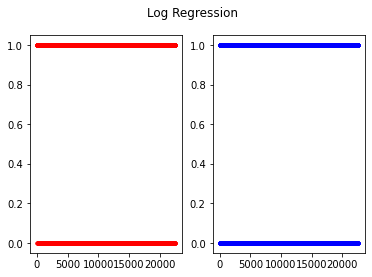

In [430]:
plt.subplot(121)
plt.scatter(num,probe_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,probe_lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

## XGBoost

In [431]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(probe_x_train, probe_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [432]:
probe_xgb_y_pred = xgb_model.predict(probe_x_test)

In [433]:
print(classification_report(probe_y_test, probe_xgb_y_pred))
probe_xgb_mae = mean_absolute_error(probe_y_test, probe_xgb_y_pred)
print("Error: " + str(probe_xgb_mae))
probe_xgb_acc = accuracy_score(probe_y_test, probe_xgb_y_pred)
print("Accuracy: " + str(probe_xgb_acc))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1106
           1       1.00      0.98      0.99     21437

    accuracy                           0.98     22543
   macro avg       0.87      0.97      0.92     22543
weighted avg       0.99      0.98      0.98     22543

Error: 0.017788226944062457
Accuracy: 0.9822117730559375


Text(0.5, 0.98, 'XGBoost')

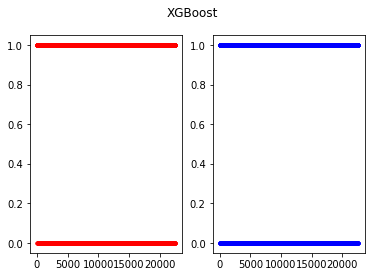

In [434]:
plt.subplot(121)
plt.scatter(num,probe_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,probe_xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

Text(0, 0.5, 'Accuracy')

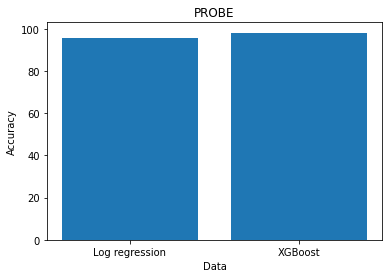

In [435]:
randommeanlist = [probe_lr_acc*100, probe_xgb_acc*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("PROBE")
plt.xlabel("Data")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean Average Error')

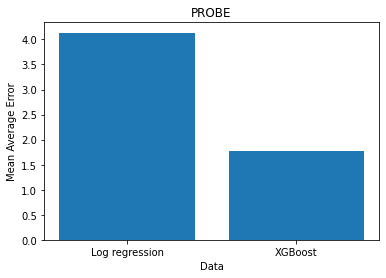

In [436]:
randommeanlist = [probe_lr_mae*100, probe_xgb_mae*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("PROBE")
plt.xlabel("Data")
plt.ylabel("Mean Average Error")

# U2R

In [437]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)
df_test_original = df_test_original.drop(["protocol_type", "service", "flag"],axis=1)
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)
df_train_original = df_train_original.drop(["protocol_type", "service", "flag"],axis=1)

In [438]:
u2r_df_train = df_train_original
u2r_df_test = df_test_original

In [439]:
u2r_df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [440]:
for i in range(len(u2r_df_train)):
  if u2r_df_train["label"][i] == "normal":
    u2r_df_train["label"][i] = 1
  elif u2r_df_train["label"][i] == "dos":
    u2r_df_train["label"][i] = 1
  elif u2r_df_train["label"][i] == "r2l":
    u2r_df_train["label"][i] = 1
  elif u2r_df_train["label"][i] == "probe":
    u2r_df_train["label"][i] = 1
  elif u2r_df_train["label"][i] == "u2r":
    u2r_df_train["label"][i] = 0
  else:
    u2r_df_train["label"][i] = 1

<ipython-input-440-2450930734b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_train["label"][i] = 1
<ipython-input-440-2450930734b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_train["label"][i] = 1
<ipython-input-440-2450930734b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_train["label"][i] = 1
<ipython-input-440-2450930734b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [441]:
for i in range(len(u2r_df_test)):
  if u2r_df_test["label"][i] == "normal":
    u2r_df_test["label"][i] = 1
  elif u2r_df_test["label"][i] == "dos":
    u2r_df_test["label"][i] = 1
  elif u2r_df_test["label"][i] == "r2l":
    u2r_df_test["label"][i] = 1
  elif u2r_df_test["label"][i] == "probe":
    u2r_df_test["label"][i] = 1
  elif u2r_df_test["label"][i] == "u2r":
    u2r_df_test["label"][i] = 0
  else:
    u2r_df_test["label"][i] = 1

<ipython-input-441-636cd9f81721>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_test["label"][i] = 1
<ipython-input-441-636cd9f81721>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_test["label"][i] = 1
<ipython-input-441-636cd9f81721>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u2r_df_test["label"][i] = 1
<ipython-input-441-636cd9f81721>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [442]:
print(u2r_df_train["label"].unique())
print(u2r_df_test["label"].unique())

[1 0]
[1 0]


In [443]:
u2r_x_train = u2r_df_train[u2r_df_train.columns[:-1]].values
u2r_y_train = u2r_df_train[u2r_df_train.columns[-1]].values.astype('int')
u2r_x_test = u2r_df_test[u2r_df_test.columns[:-1]].values
u2r_y_test = u2r_df_test[u2r_df_test.columns[-1]].values.astype('int')

In [444]:
scaler = StandardScaler()
u2r_x_train = scaler.fit_transform(u2r_x_train)
u2r_x_test = scaler.transform(u2r_x_test)

## Log Regression

In [445]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(u2r_x_train, u2r_y_train)
u2r_lr_y_pred = lg_model.predict(u2r_x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [446]:
print(classification_report(u2r_y_test, u2r_lr_y_pred))
u2r_lr_mae = mean_absolute_error(u2r_y_test, u2r_lr_y_pred)
print("Error: " + str(u2r_lr_mae))
u2r_lr_acc = accuracy_score(u2r_y_test, u2r_lr_y_pred)
print("Accuracy: " + str(u2r_lr_acc))

              precision    recall  f1-score   support

           0       0.56      0.14      0.22        37
           1       1.00      1.00      1.00     22506

    accuracy                           1.00     22543
   macro avg       0.78      0.57      0.61     22543
weighted avg       1.00      1.00      1.00     22543

Error: 0.0015969480548285498
Accuracy: 0.9984030519451714


Text(0.5, 0.98, 'Log Regression')

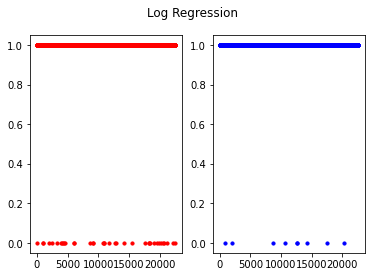

In [447]:
plt.subplot(121)
plt.scatter(num,u2r_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,u2r_lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

## XGBoost

In [448]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(u2r_x_train, u2r_y_train)
u2r_xgb_y_pred = xgb_model.predict(u2r_x_test)

In [449]:
print(classification_report(u2r_y_test, u2r_xgb_y_pred))
u2r_xgb_mae = mean_absolute_error(u2r_y_test, u2r_xgb_y_pred)
print("Error: " + str(u2r_xgb_mae))
u2r_xgb_acc = accuracy_score(u2r_y_test, u2r_xgb_y_pred)
print("Accuracy: " + str(u2r_xgb_acc))

              precision    recall  f1-score   support

           0       0.29      0.05      0.09        37
           1       1.00      1.00      1.00     22506

    accuracy                           1.00     22543
   macro avg       0.64      0.53      0.55     22543
weighted avg       1.00      1.00      1.00     22543

Error: 0.0017743867275872777
Accuracy: 0.9982256132724128


Text(0.5, 0.98, 'XGBoost')

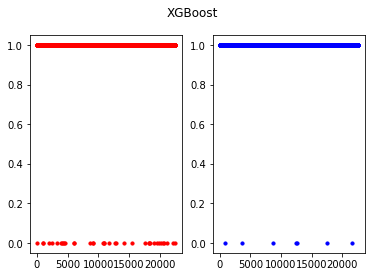

In [450]:
plt.subplot(121)
plt.scatter(num,u2r_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,u2r_xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

Text(0, 0.5, 'Accuracy')

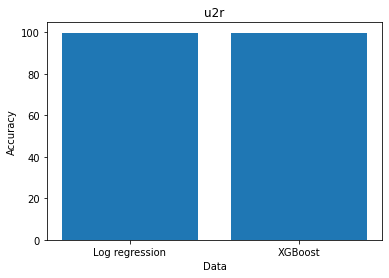

In [451]:
randommeanlist = [u2r_lr_acc*100, u2r_xgb_acc*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("u2r")
plt.xlabel("Data")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean Average Error')

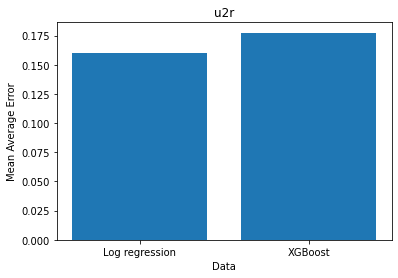

In [452]:
randommeanlist = [u2r_lr_mae*100, u2r_xgb_mae*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("u2r")
plt.xlabel("Data")
plt.ylabel("Mean Average Error")

# Normal

In [453]:
df_train = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/train_improved.csv', sep=",")
#df_train = df_train[df_train.columns[:-1]]
df_test = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/test_imp.csv', index_col=0)
#df_test = df_test[df_test.columns[:-1]]
titles = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Field Names.csv', header=None)
#titles = titles[titles.columns[:-1]]
attack = pd.read_csv('/content/drive/MyDrive/FYP ML/DATA/Attack Types.csv', sep=",",header=None)
df_test_original = df_test
df_train_original = df_train
df_train = df_train.drop(["protocol_type", "service", "flag"],axis=1)
df_test_original = df_test_original.drop(["protocol_type", "service", "flag"],axis=1)
df_test = df_test.drop(["protocol_type", "service", "flag"],axis=1)
df_train_original = df_train_original.drop(["protocol_type", "service", "flag"],axis=1)

In [454]:
normal_df_train = df_train_original
normal_df_test = df_test_original
normal_df_train["label"].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r', 'unknown'], dtype=object)

In [455]:
for i in range(len(normal_df_train)):
  if normal_df_train["label"][i] == "normal":
    normal_df_train["label"][i] = 0
  elif normal_df_train["label"][i] == "dos":
    normal_df_train["label"][i] = 1
  elif normal_df_train["label"][i] == "r2l":
    normal_df_train["label"][i] = 1
  elif normal_df_train["label"][i] == "probe":
    normal_df_train["label"][i] = 1
  elif normal_df_train["label"][i] == "u2r":
    normal_df_train["label"][i] = 1
  else:
    normal_df_train["label"][i] = 1

<ipython-input-455-1890c1d39055>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_train["label"][i] = 0
<ipython-input-455-1890c1d39055>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_train["label"][i] = 1
<ipython-input-455-1890c1d39055>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_train["label"][i] = 1
<ipython-input-455-1890c1d39055>:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [456]:
for i in range(len(normal_df_test)):
  if normal_df_test["label"][i] == "normal":
    normal_df_test["label"][i] = 0
  elif normal_df_test["label"][i] == "dos":
    normal_df_test["label"][i] = 1
  elif normal_df_test["label"][i] == "r2l":
    normal_df_test["label"][i] = 1
  elif normal_df_test["label"][i] == "probe":
    normal_df_test["label"][i] = 1
  elif normal_df_test["label"][i] == "u2r":
    normal_df_test["label"][i] = 1
  else:
    normal_df_test["label"][i] = 1

<ipython-input-456-a9c0e9e0c75a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_test["label"][i] = 1
<ipython-input-456-a9c0e9e0c75a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_test["label"][i] = 0
<ipython-input-456-a9c0e9e0c75a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df_test["label"][i] = 1
<ipython-input-456-a9c0e9e0c75a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [457]:
print(normal_df_train["label"].unique())
print(normal_df_test["label"].unique())

[0 1]
[1 0]


In [458]:
normal_x_train = normal_df_train[normal_df_train.columns[:-1]].values
normal_y_train = normal_df_train[normal_df_train.columns[-1]].values.astype('int')
normal_x_test = normal_df_test[normal_df_test.columns[:-1]].values
normal_y_test = normal_df_test[normal_df_test.columns[-1]].values.astype('int')
scaler = StandardScaler()
normal_x_train = scaler.fit_transform(normal_x_train)
normal_x_test = scaler.transform(normal_x_test)

## Log Regression

In [459]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(normal_x_train, normal_y_train)
normal_lr_y_pred = lg_model.predict(normal_x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [460]:
print(classification_report(normal_y_test, normal_lr_y_pred))
normal_lr_mae = mean_absolute_error(normal_y_test, normal_lr_y_pred)
print("Error: " + str(normal_lr_mae))
normal_lr_acc = accuracy_score(normal_y_test, normal_lr_y_pred)
print("Accuracy: " + str(normal_lr_acc))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76      9710
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22543
   macro avg       0.78      0.77      0.75     22543
weighted avg       0.80      0.75      0.75     22543

Error: 0.2475713081666149
Accuracy: 0.7524286918333851


Text(0.5, 0.98, 'Log Regression')

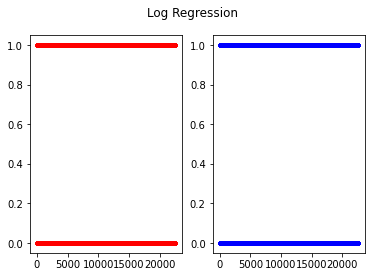

In [461]:
plt.subplot(121)
plt.scatter(num,normal_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,normal_lr_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("Log Regression")

## XGBoost

In [462]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(normal_x_train, normal_y_train)
normal_xgb_y_pred = xgb_model.predict(normal_x_test)

In [463]:
print(classification_report(normal_y_test, normal_xgb_y_pred))
normal_xgb_mae = mean_absolute_error(normal_y_test, normal_xgb_y_pred)
print("Error: " + str(normal_xgb_mae))
normal_xgb_acc = accuracy_score(normal_y_test, normal_xgb_y_pred)
print("Accuracy: " + str(normal_xgb_acc))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      9710
           1       0.97      0.82      0.89     12833

    accuracy                           0.88     22543
   macro avg       0.89      0.89      0.88     22543
weighted avg       0.90      0.88      0.88     22543

Error: 0.11648848866610478
Accuracy: 0.8835115113338953


Text(0.5, 0.98, 'XGBoost')

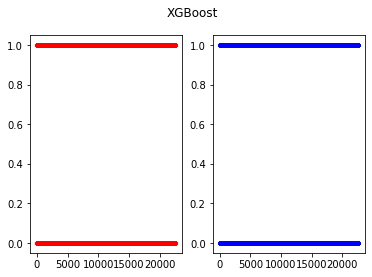

In [464]:
plt.subplot(121)
plt.scatter(num,normal_y_test,label="Actual", s=10, color = 'red', alpha=1)
plt.subplot(122)
plt.scatter(num,normal_xgb_y_pred,label="Predicted", s=10, color = 'blue', alpha=1)
plt.suptitle("XGBoost")

Text(0, 0.5, 'Accuracy')

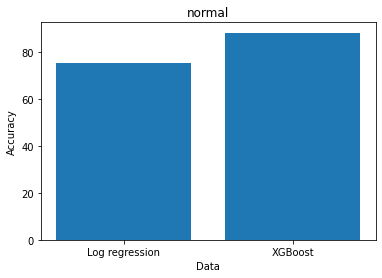

In [465]:
randommeanlist = [normal_lr_acc*100, normal_xgb_acc*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("normal")
plt.xlabel("Data")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Mean Average Error')

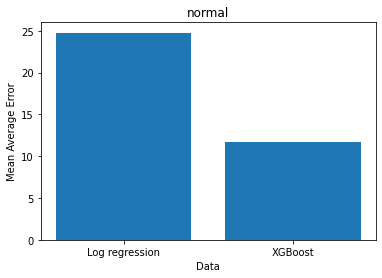

In [466]:
randommeanlist = [normal_lr_mae*100, normal_xgb_mae*100]
namerandom = ['Log regression', 'XGBoost']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("normal")
plt.xlabel("Data")
plt.ylabel("Mean Average Error")

# results

DDOS: 0.9849177128155081
R2L: 0.9079093288382203
Probe: 0.9822117730559375
U2R: 0.9982256132724128
Normal: 0.8835115113338953


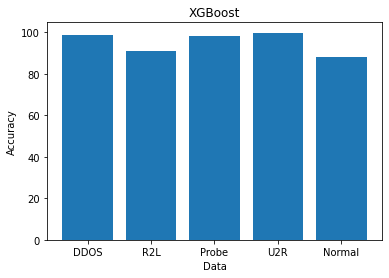

In [467]:
randommeanlist = [dos_xgb_acc*100, r2l_xgb_acc*100, probe_xgb_acc*100, u2r_xgb_acc*100, normal_xgb_acc*100]
namerandom = ['DDOS', 'R2L', 'Probe', 'U2R', 'Normal']
# Graph for RandomForest Nonscaled vs NonScaled data:
plt.bar(namerandom,randommeanlist)
plt.title("XGBoost")
plt.xlabel("Data")
plt.ylabel("Accuracy")
print("DDOS: " + str(dos_xgb_acc))
print("R2L: " + str(r2l_xgb_acc))
print("Probe: " + str(probe_xgb_acc))
print("U2R: " + str(u2r_xgb_acc))
print("Normal: " + str(normal_xgb_acc))